In [31]:
import pandas as pd
import glob
from threshold import *
import matplotlib.pyplot as plt

In [32]:
df_final = pd.read_csv('predict.csv')
wavelength_list = [w.split('/')[2] for w in glob.glob('imm_0.05_tol_0.05/n_gram_1/*/05')]
for wave in wavelength_list:
    predicted_list = sorted(glob.glob('imm_0.05_tol_0.05/n_gram_1/{}/0*/prediction_validate.csv'.format(wave)))
    frame = []
    for csv in predicted_list:
        df = pd.read_csv(csv)
        frame.append(df)
    df_t = pd.concat(frame, axis=1)
    df_t = df_t.loc[:,~df_t.columns.duplicated()]
    df_t['mean'] = df_t.mean(numeric_only=True, axis=1)
    df_final[wave] = df_t['mean']


In [33]:
# df_ev --> df [e]xperimental [v]alidation
df_ev = pd.read_csv('expr_val_seq.csv')

In [34]:
df_ev_finished = df_ev[list(df_final.columns)]
df_ev_finished

,sequence,1228.6107,1197.3094,1306.2490,1194.4159,1229.5724,1293.8253,1244.4697,1286.1729,1274.2052,...,1243.5091,1255.9896,1240.1467,1312.9328,1217.5444,1203.5764,1294.7815,1246.8706,1220.4323,1300.0390
0,AACACATTGACGTGCACT,0.523035,0.468355,0.671042,0.457038,0.525411,0.648985,0.519383,0.627058,0.592164,...,0.519848,0.524817,0.521663,0.653868,0.517574,0.495398,0.661566,0.520418,0.515558,0.662376
1,AGGCCACCGTCGCACGTG,0.562692,0.520604,0.683437,0.501488,0.559794,0.657087,0.554587,0.620945,0.585038,...,0.536446,0.539595,0.556846,0.693142,0.587071,0.561556,0.659165,0.532704,0.580654,0.676854
2,GTTCAGCCTTTTCGTTCG,0.500037,0.457817,0.688326,0.443238,0.499695,0.671833,0.495205,0.638296,0.582097,...,0.490774,0.506822,0.496693,0.656334,0.494929,0.482916,0.668630,0.481082,0.499794,0.687308
3,AGCACAACACGGCAACCT,1.602821,1.677674,1.705349,1.604948,1.596246,1.599818,1.467355,1.530672,1.496986,...,1.470970,1.436631,1.487458,1.703165,1.689694,1.786843,1.619074,1.450532,1.660183,1.678337
4,ACGCCAACACATTCCGCT,1.625795,1.717778,1.736120,1.654080,1.605259,1.676269,1.488641,1.638834,1.503297,...,1.502193,1.452445,1.505592,1.707547,1.724853,1.798482,1.699407,1.455285,1.692654,1.761152
5,AGCACCAGACAGCACACT,2.045718,1.964495,1.920351,1.880587,2.081682,1.888948,1.908244,1.881187,1.938270,...,1.922260,1.855443,1.935554,1.916098,2.182572,2.117474,1.878315,1.867919,2.151074,1.892470


In [35]:
df_final.columns

Index(['sequence', '1228.6107', '1197.3094', '1306.2490', '1194.4159',
       '1229.5724', '1293.8253', '1244.4697', '1286.1729', '1274.2052',
       '1270.8520', '1252.1509', '1285.6944', '1295.7376', '1266.0598',
       '1269.8937', '1196.8272', '1216.1002', '1288.0865', '1211.2850',
       '1265.1011', '1283.3019', '1193.4512', '1205.9858', '1318.1813',
       '1198.7559', '1219.4698', '1199.7202', '1214.6559', '1216.5817',
       '1251.1910', '1206.4677', '1305.2939', '1186.2136', '1218.9885',
       '1195.8627', '1225.7248', '1308.6366', '1289.9998', '1276.5998',
       '1230.0533', '1303.8610', '1236.3026', '1205.5040', '1239.1858',
       '1299.5611', '1292.8691', '1301.4724', '1281.3874', '1294.3034',
       '1261.7451', '1313.4100', '1184.7656', '1278.5151', '1229.0916',
       '1194.8982', '1207.9131', '1198.2738', '1248.3109', '1238.2248',
       '1206.9495', '1280.4301', '1272.2892', '1243.5091', '1255.9896',
       '1240.1467', '1312.9328', '1217.5444', '1203.5764', '1294.

In [36]:
estimation_dict = {}
for seq in df_ev_finished['sequence']:
    estimation_dict[seq] = estimation_mean(df_ev_finished, df_final, seq)
    
# def estimation_mean(df_actual, df_predict, sequence):

In [37]:
estimation_dict

{'AACACATTGACGTGCACT': -0.3610145770832916,
 'AGGCCACCGTCGCACGTG': -0.3476017467678377,
 'GTTCAGCCTTTTCGTTCG': -0.181040447793928,
 'AGCACAACACGGCAACCT': 0.3682150076354555,
 'ACGCCAACACATTCCGCT': 0.651603773869364,
 'AGCACCAGACAGCACACT': 0.9223135680437912}

In [38]:
df_pre = df_final[['sequence']+sorted(list(df_final.columns)[1:])]
df_pre.set_index('sequence', inplace = True)
df_pre

,1184.7656,1186.2136,1193.4512,1194.4159,1194.8982,1195.8627,1196.8272,1197.3094,1198.2738,1198.7559,...,1299.5611,1300.0390,1301.4724,1303.8610,1305.2939,1306.2490,1308.6366,1312.9328,1313.4100,1318.1813
sequence,,,,,,,,,,,,,,,,,,,,,
AACACATTGACGTGCACT,0.627193,0.653277,0.746084,0.754923,0.765721,0.751910,0.795701,0.794478,0.821041,0.807882,...,1.080574,1.100616,1.126310,1.136856,1.020906,1.074747,1.119865,1.093812,1.064020,1.055950
AGGCCACCGTCGCACGTG,0.681944,0.680221,0.752771,0.788493,0.761337,0.766322,0.797964,0.812795,0.812664,0.814775,...,1.093492,1.176731,1.122016,1.103095,1.118185,1.135515,1.123582,1.070359,1.123751,1.052858
GTTCAGCCTTTTCGTTCG,0.530058,0.538308,0.625573,0.635345,0.621369,0.612610,0.652517,0.631944,0.670623,0.665831,...,0.859927,0.847865,0.837520,0.834929,0.842671,0.832794,0.835137,0.815041,0.822777,0.784344
AGCACAACACGGCAACCT,0.897880,0.980908,1.122705,1.159759,1.127104,1.201159,1.209409,1.220463,1.247561,1.249627,...,1.390603,1.358356,1.324057,1.326219,1.345903,1.340230,1.370834,1.328729,1.351767,1.197772
ACGCCAACACATTCCGCT,0.759390,0.777764,0.887839,0.890465,0.925893,0.917633,0.926756,0.930094,0.918637,0.906371,...,1.137345,1.128207,1.069975,1.163169,1.124772,1.140622,1.129278,1.112346,1.098985,1.092347
AGCACCAGACAGCACACT,0.770615,0.819353,0.959490,0.972737,0.979466,1.009795,0.993228,0.991793,1.055473,0.967481,...,1.183756,1.152346,1.154716,1.150902,1.157482,1.149457,1.162045,1.152120,1.163998,1.073066


In [39]:
df_val = df_ev_finished[['sequence']+sorted(list(df_ev_finished.columns)[1:])]
df_val.set_index('sequence', inplace = True)
df_val

,1184.7656,1186.2136,1193.4512,1194.4159,1194.8982,1195.8627,1196.8272,1197.3094,1198.2738,1198.7559,...,1299.5611,1300.0390,1301.4724,1303.8610,1305.2939,1306.2490,1308.6366,1312.9328,1313.4100,1318.1813
sequence,,,,,,,,,,,,,,,,,,,,,
AACACATTGACGTGCACT,0.395497,0.400198,0.451354,0.457038,0.459935,0.461895,0.469442,0.468355,0.475681,0.474982,...,0.664545,0.662376,0.664208,0.673970,0.665151,0.671042,0.663163,0.653868,0.659393,0.652956
AGGCCACCGTCGCACGTG,0.419404,0.429261,0.490453,0.501488,0.499247,0.509511,0.516238,0.520604,0.527433,0.533035,...,0.672065,0.676854,0.682594,0.682890,0.672249,0.683437,0.689826,0.693142,0.683601,0.681469
GTTCAGCCTTTTCGTTCG,0.378806,0.387356,0.437885,0.443238,0.445649,0.448129,0.453608,0.457817,0.461627,0.464703,...,0.687350,0.687308,0.683599,0.677954,0.677623,0.688326,0.672685,0.656334,0.663911,0.639626
AGCACAACACGGCAACCT,1.280463,1.331000,1.576685,1.604948,1.613965,1.636352,1.659621,1.677674,1.703043,1.711685,...,1.675895,1.678337,1.689164,1.704043,1.715068,1.705349,1.734742,1.703165,1.731573,1.709715
ACGCCAACACATTCCGCT,1.351803,1.407012,1.624630,1.654080,1.663286,1.686091,1.700155,1.717778,1.740478,1.744383,...,1.735754,1.761152,1.731848,1.763883,1.748491,1.736120,1.736854,1.707547,1.689940,1.634057
AGCACCAGACAGCACACT,1.543163,1.588839,1.848326,1.880587,1.886641,1.919276,1.943743,1.964495,1.994003,1.999526,...,1.887439,1.892470,1.895246,1.929558,1.915948,1.920351,1.939212,1.916098,1.904909,1.886199


In [40]:
wavelength_value = [float(i) for i in sorted(list(df_pre.columns))]

In [41]:
def ploting_prediction_experimental(df_val, df_pre, sequence,save_path):
    y_label = ['predicted','experimental']
    plt.rcParams.update({'font.size': 200,'figure.dpi':50})
    plt.subplots(figsize=(150, 100))
    plt.scatter(wavelength_value,df_pre.loc[sequence].values.flatten().tolist(),color = 'red', s = 1000)
    plt.scatter(wavelength_value,df_val.loc[sequence].values.flatten().tolist(),color = 'blue', s = 1000)
    plt.grid(color='gray', linestyle='-')
    lgnd = plt.legend(y_label
                ,loc='upper center'
                , bbox_to_anchor=(0.5, -0.08)
                ,fancybox=True
                ,shadow=True
                ,ncol=3
                ,scatterpoints=1
                  )
    lgnd.legendHandles[0]._sizes = [10000]
    lgnd.legendHandles[1]._sizes = [10000]
    plt.title(seq,weight='bold')
    plt.xlabel('I_{0}',weight='bold', fontsize=200,labelpad=50)
    plt.ylabel(r'$ \Delta F/F $', fontsize=200,weight='bold',labelpad=50)
    plt.savefig(save_path)

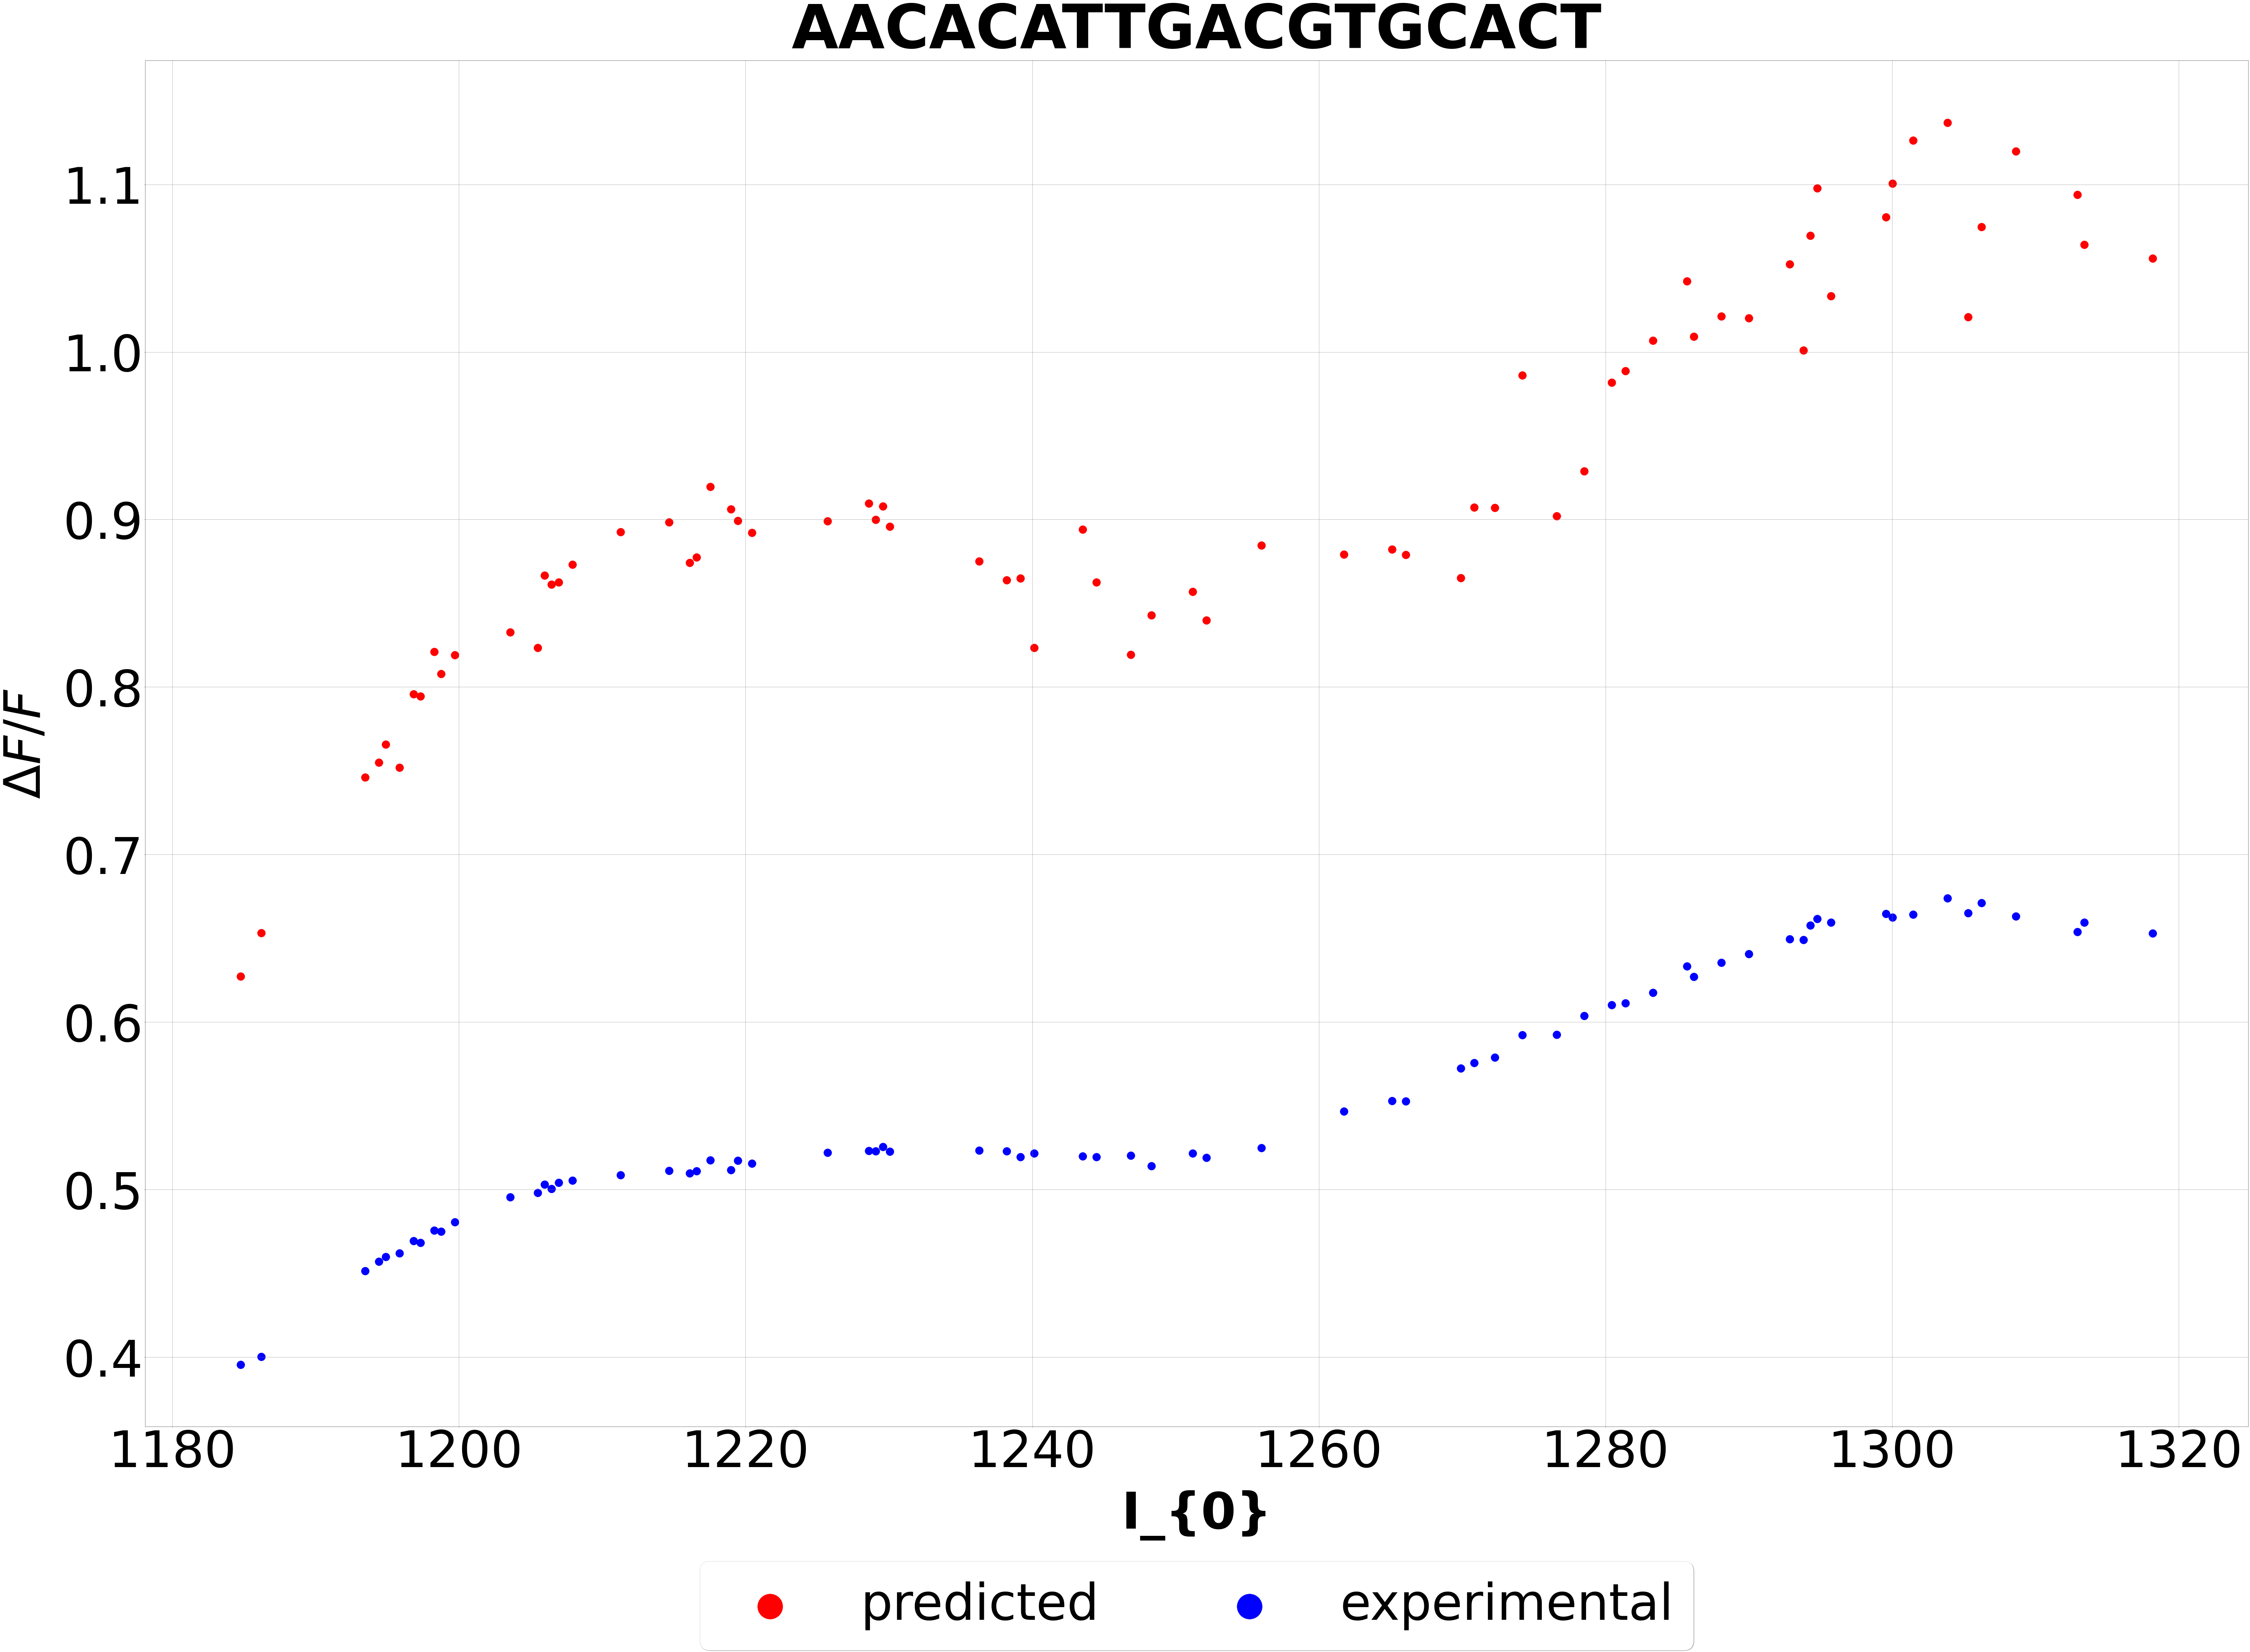

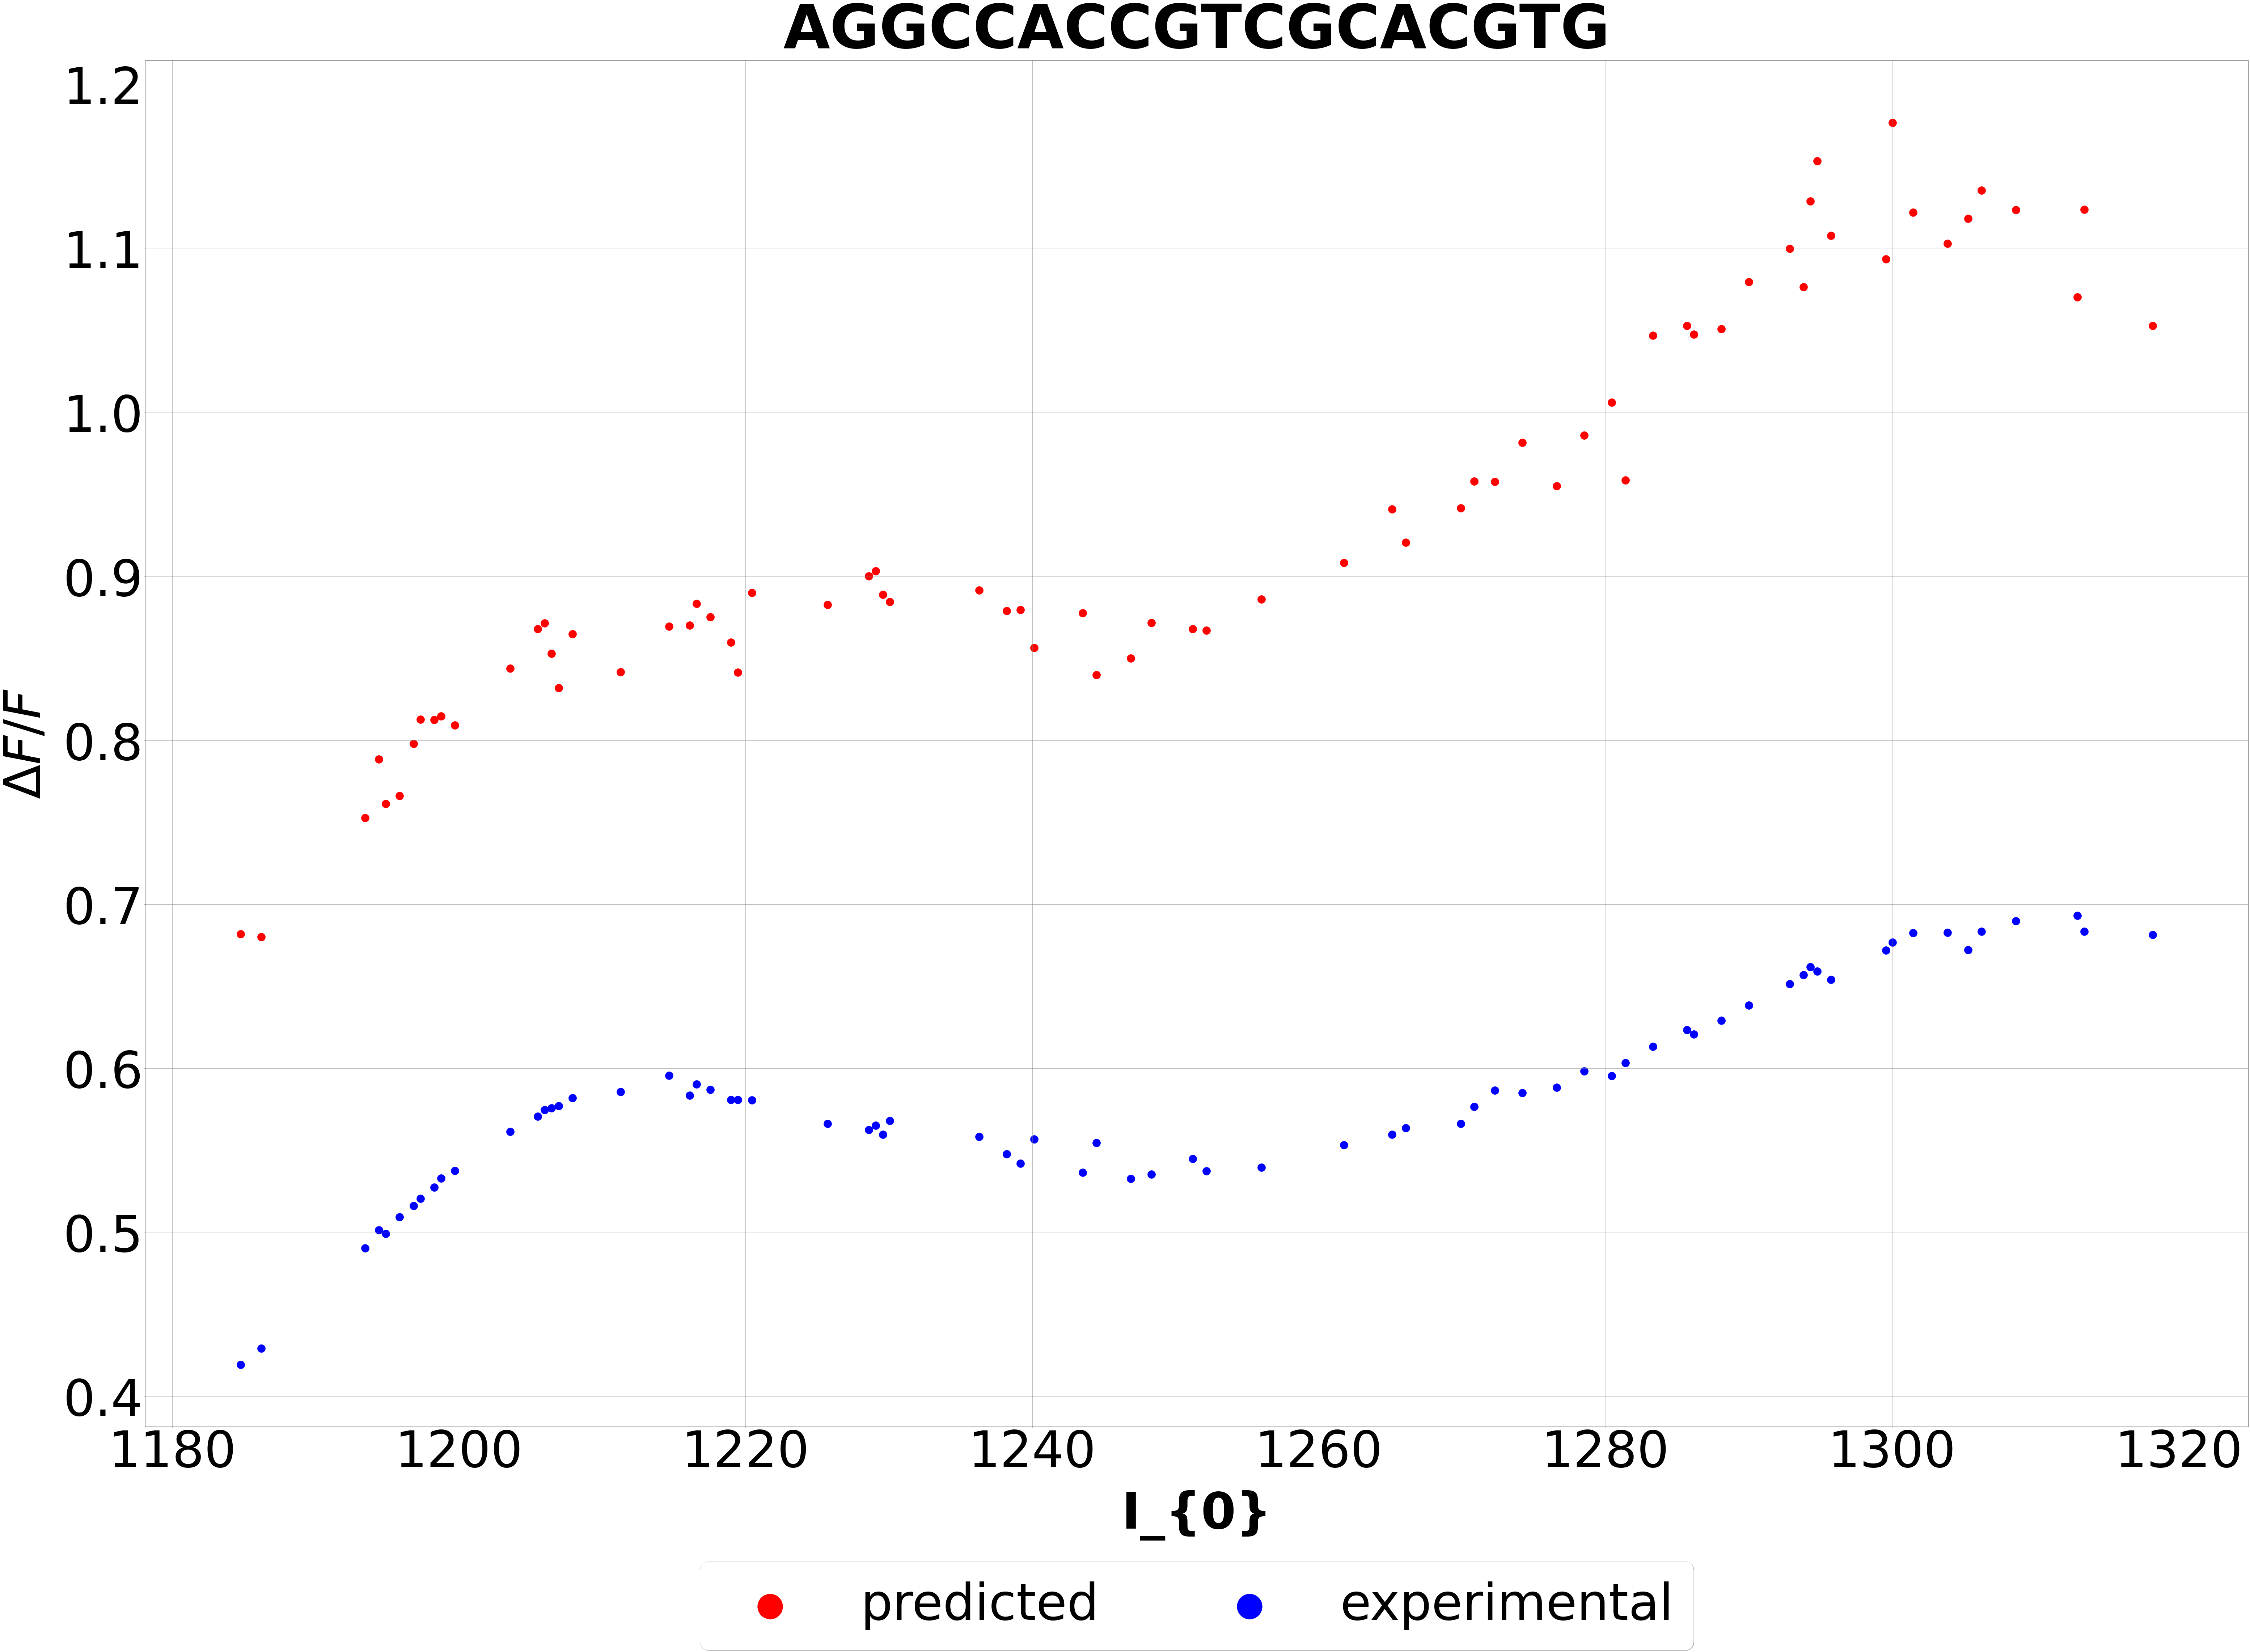

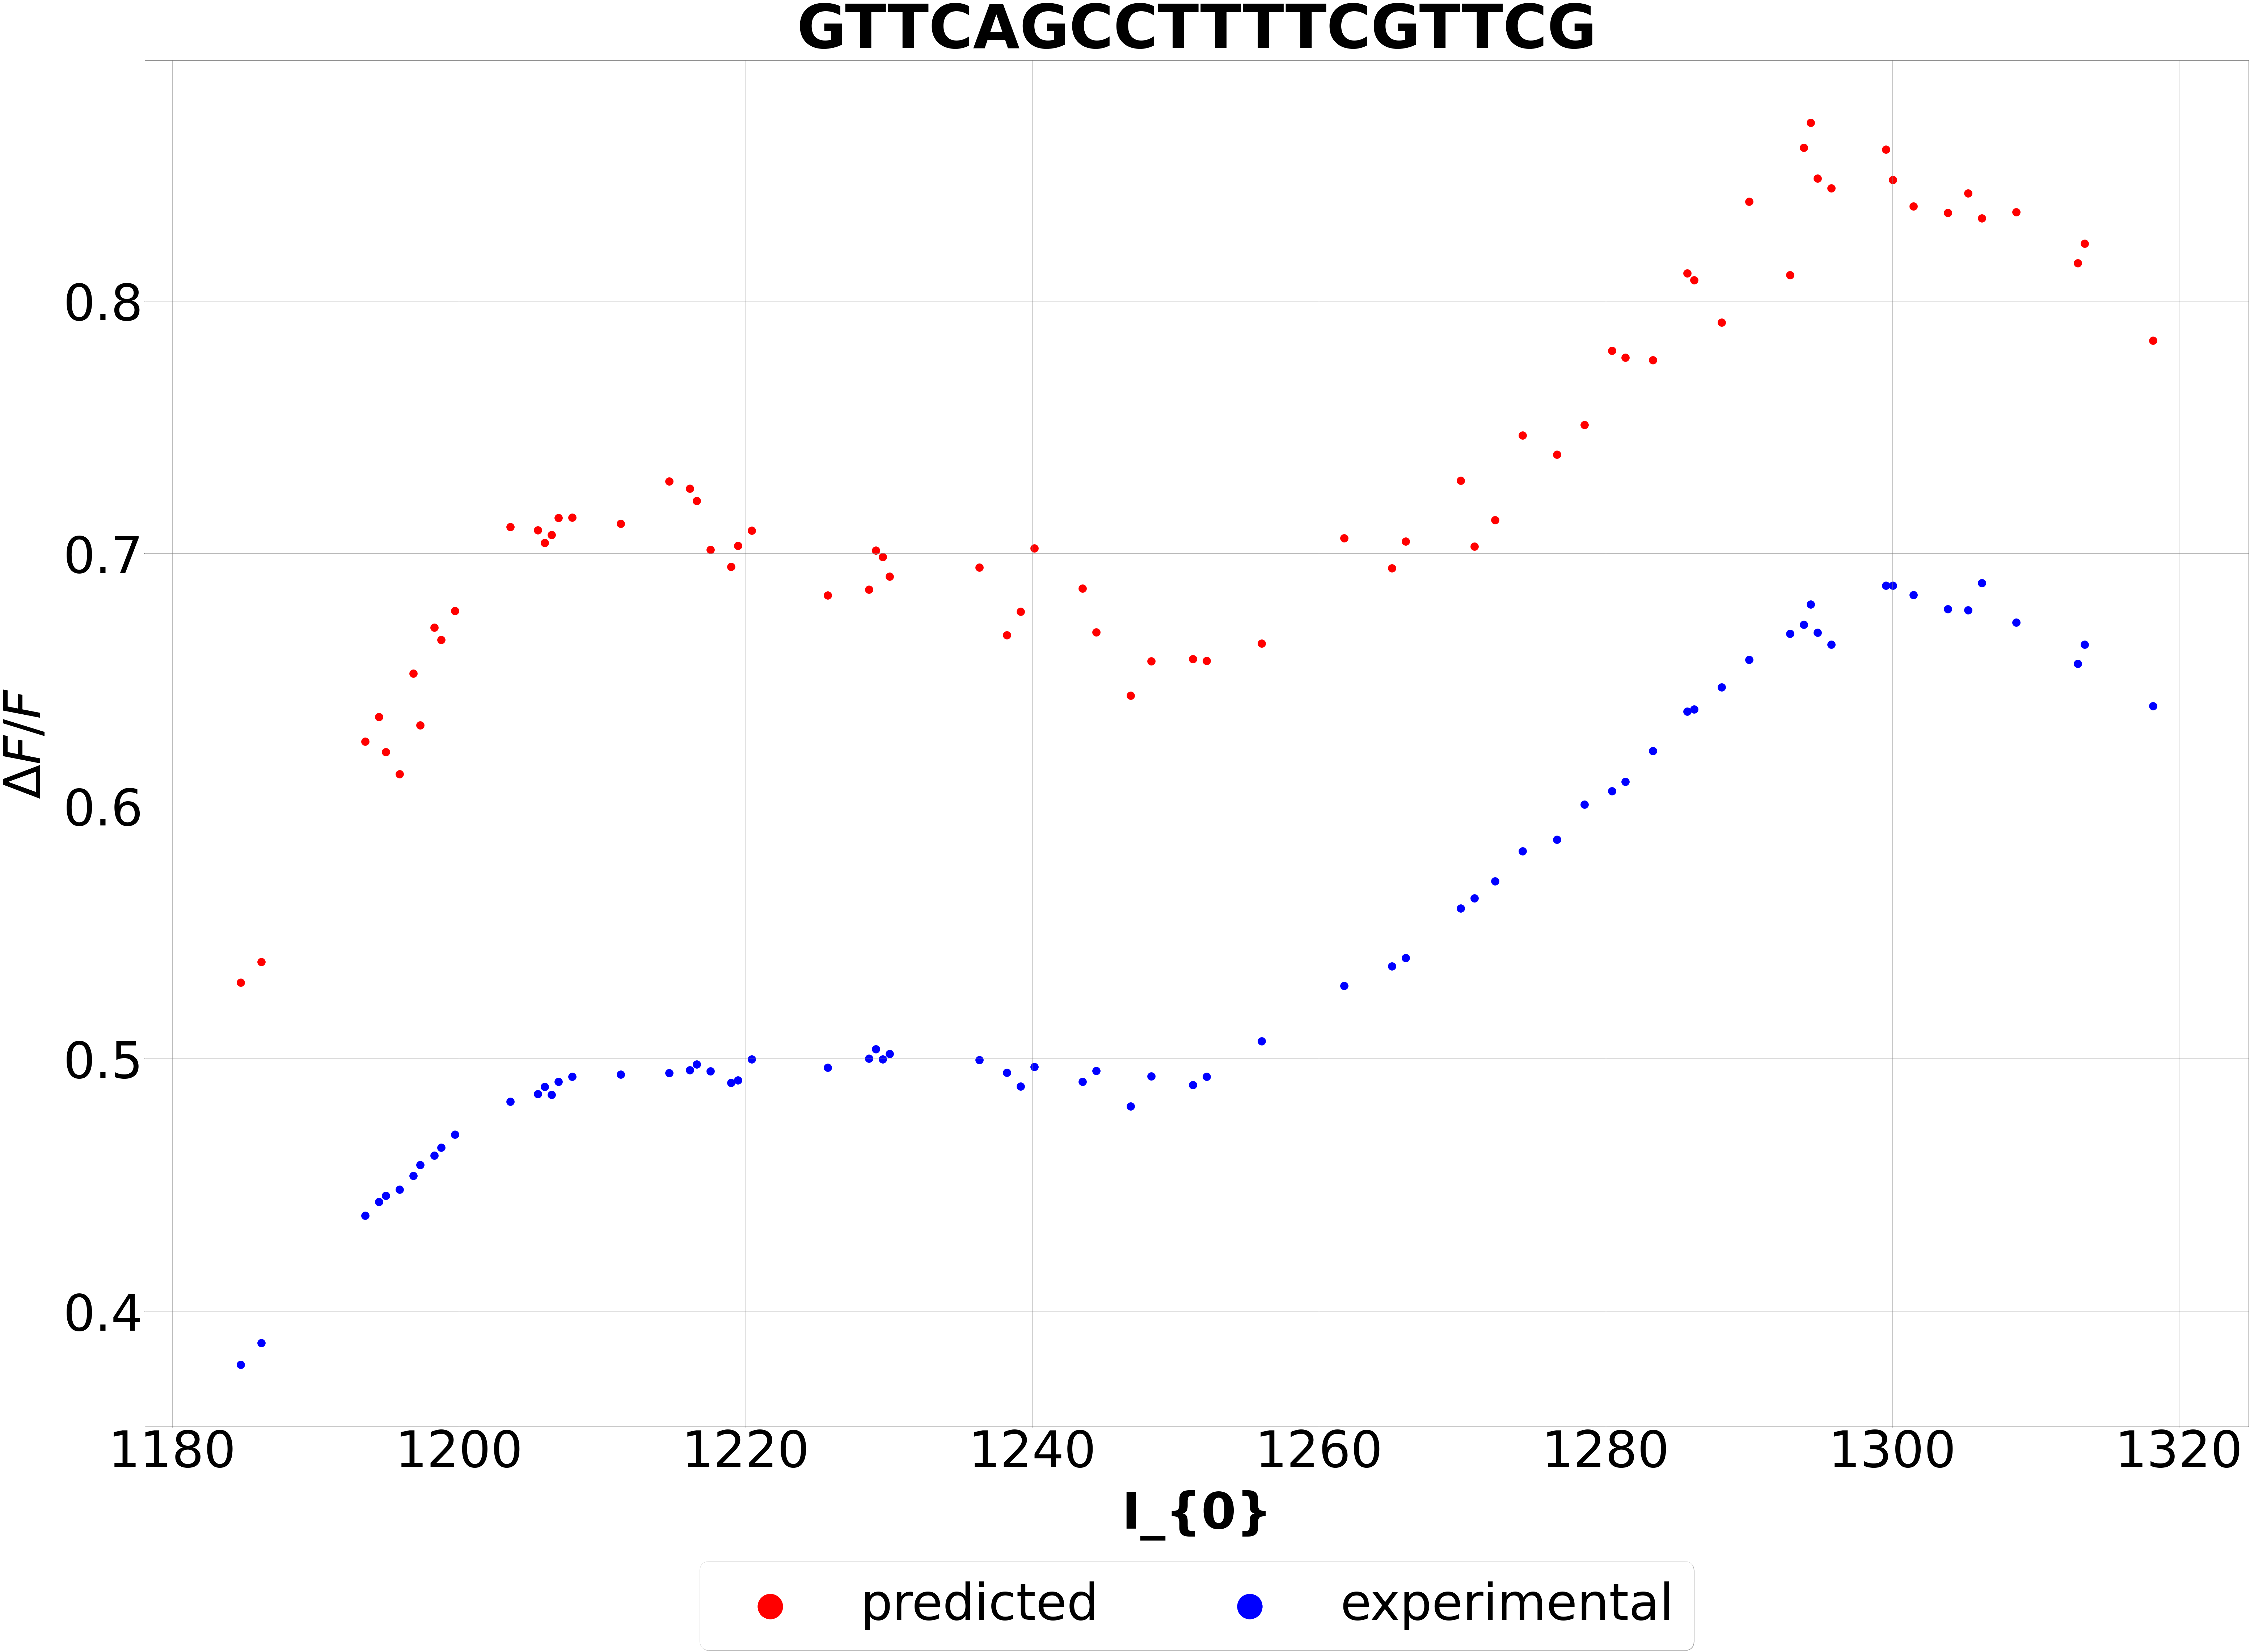

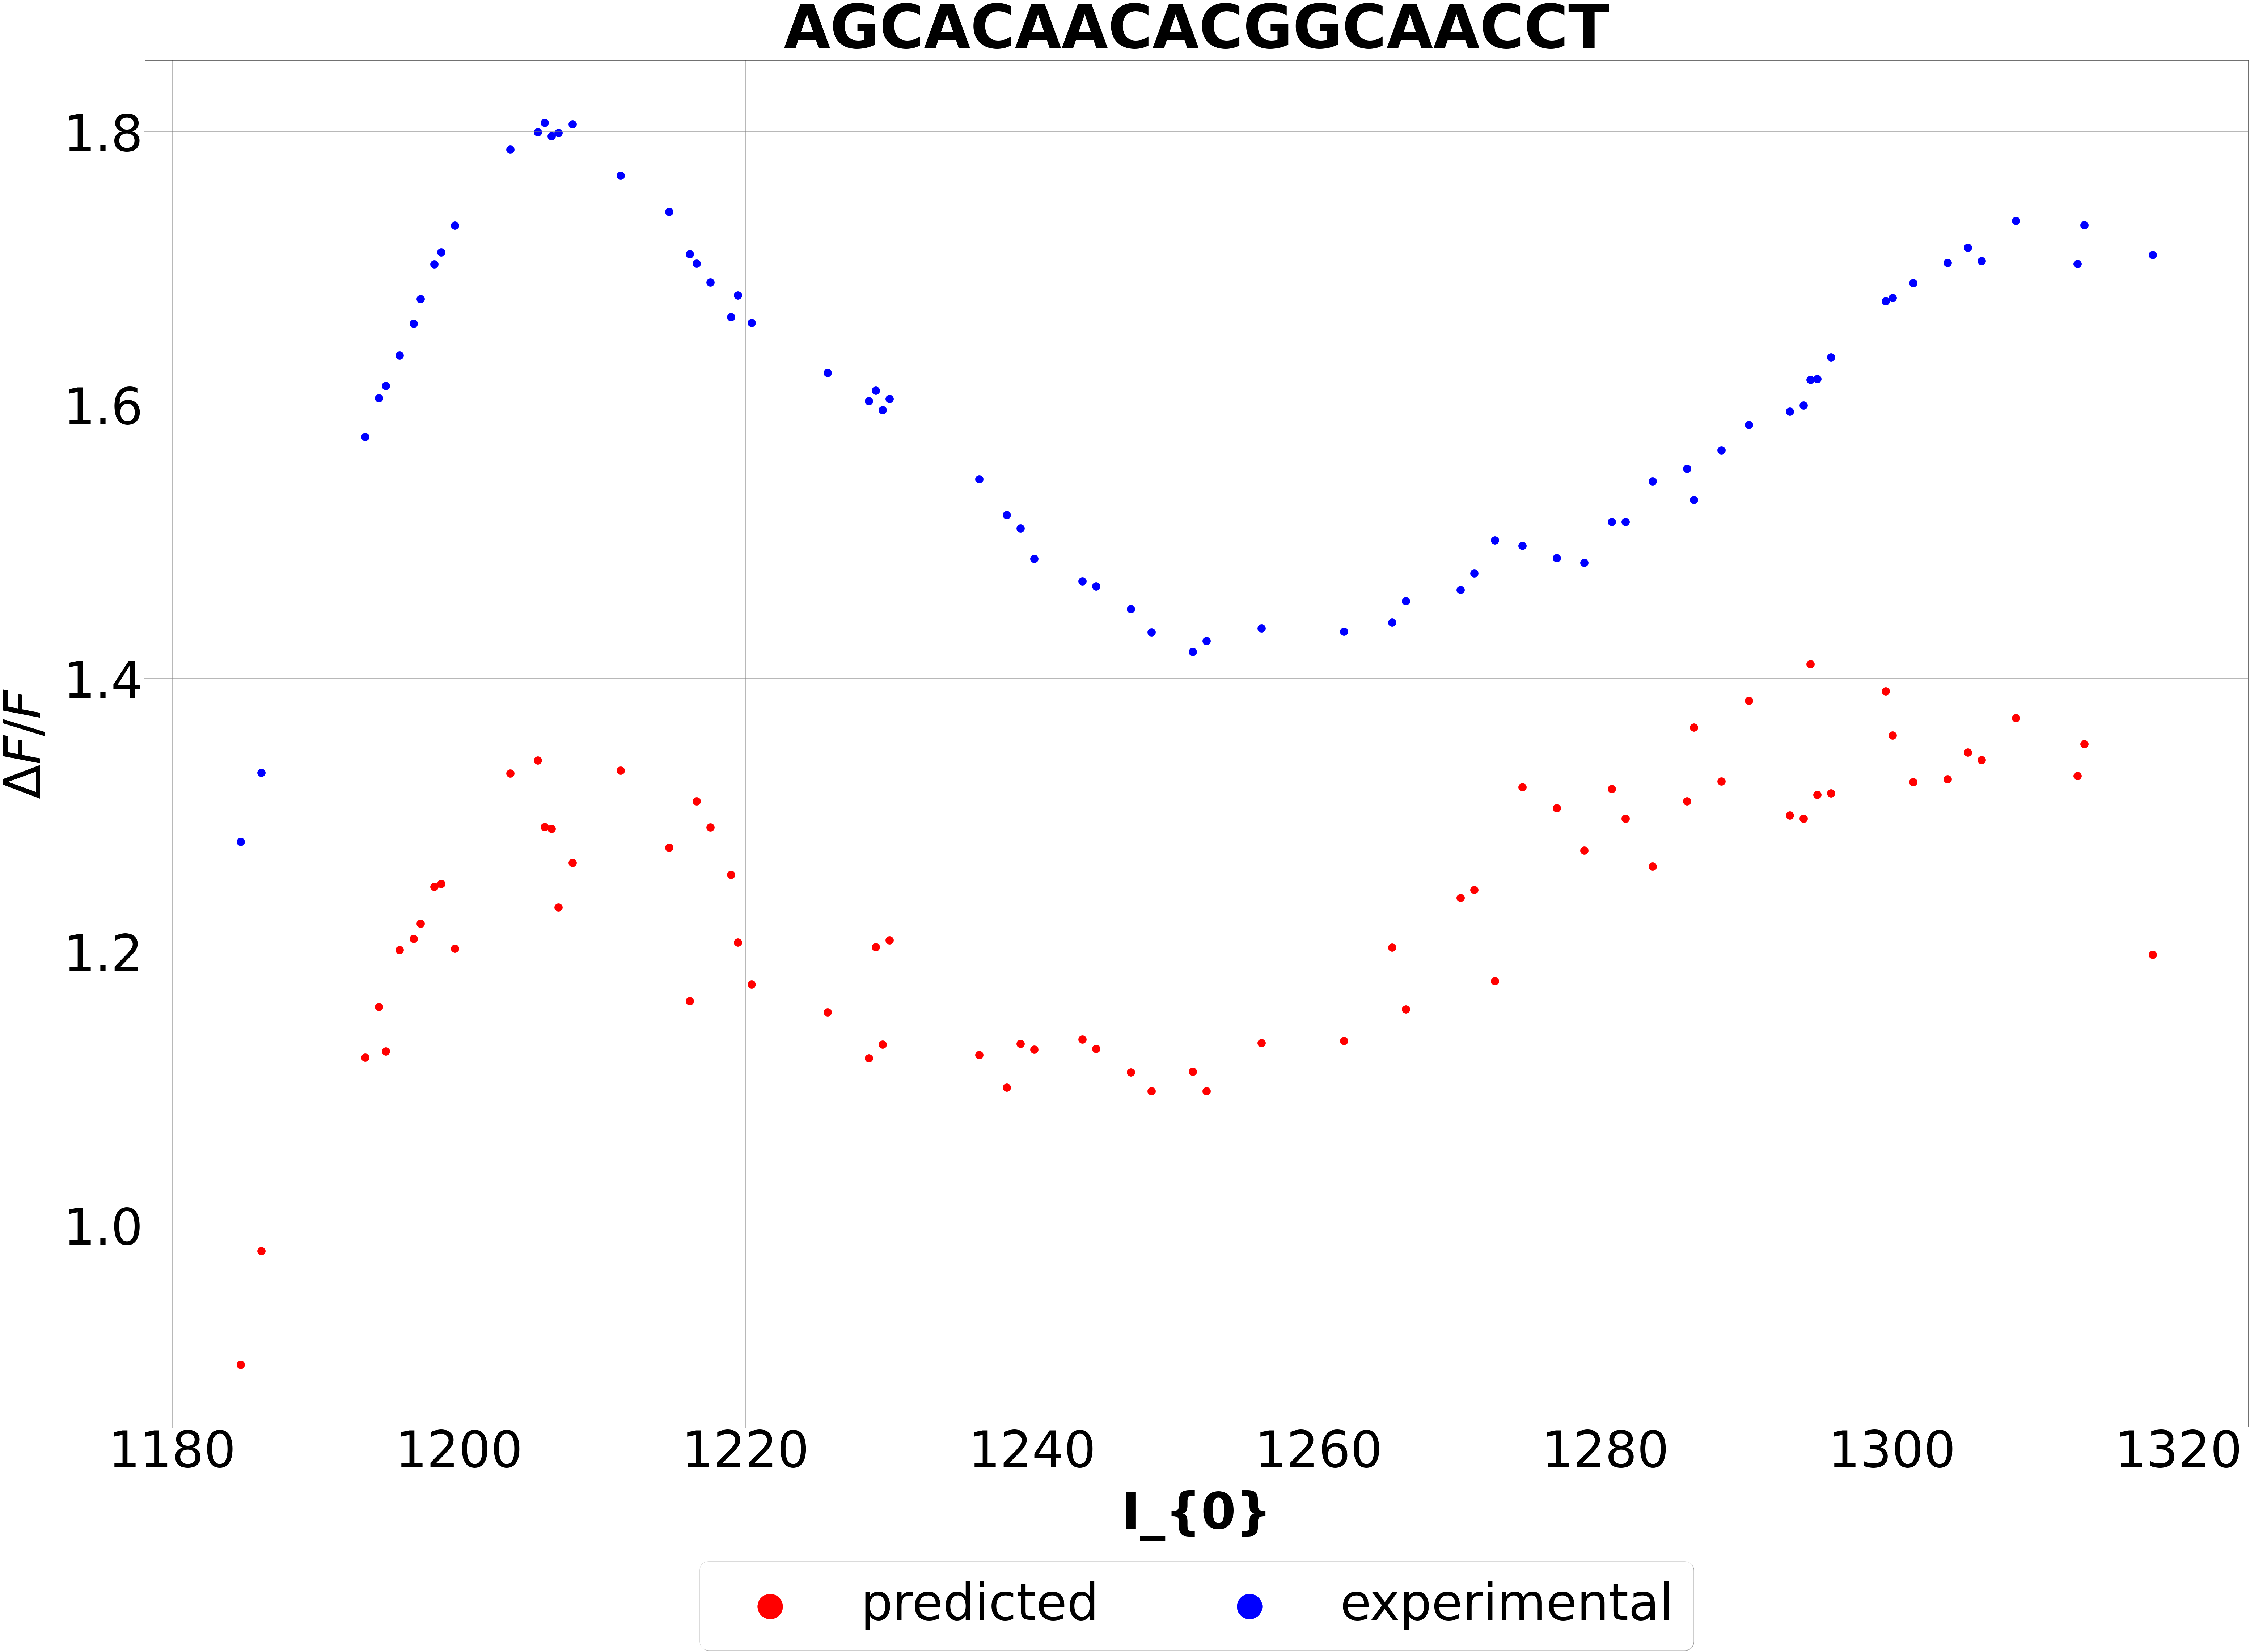

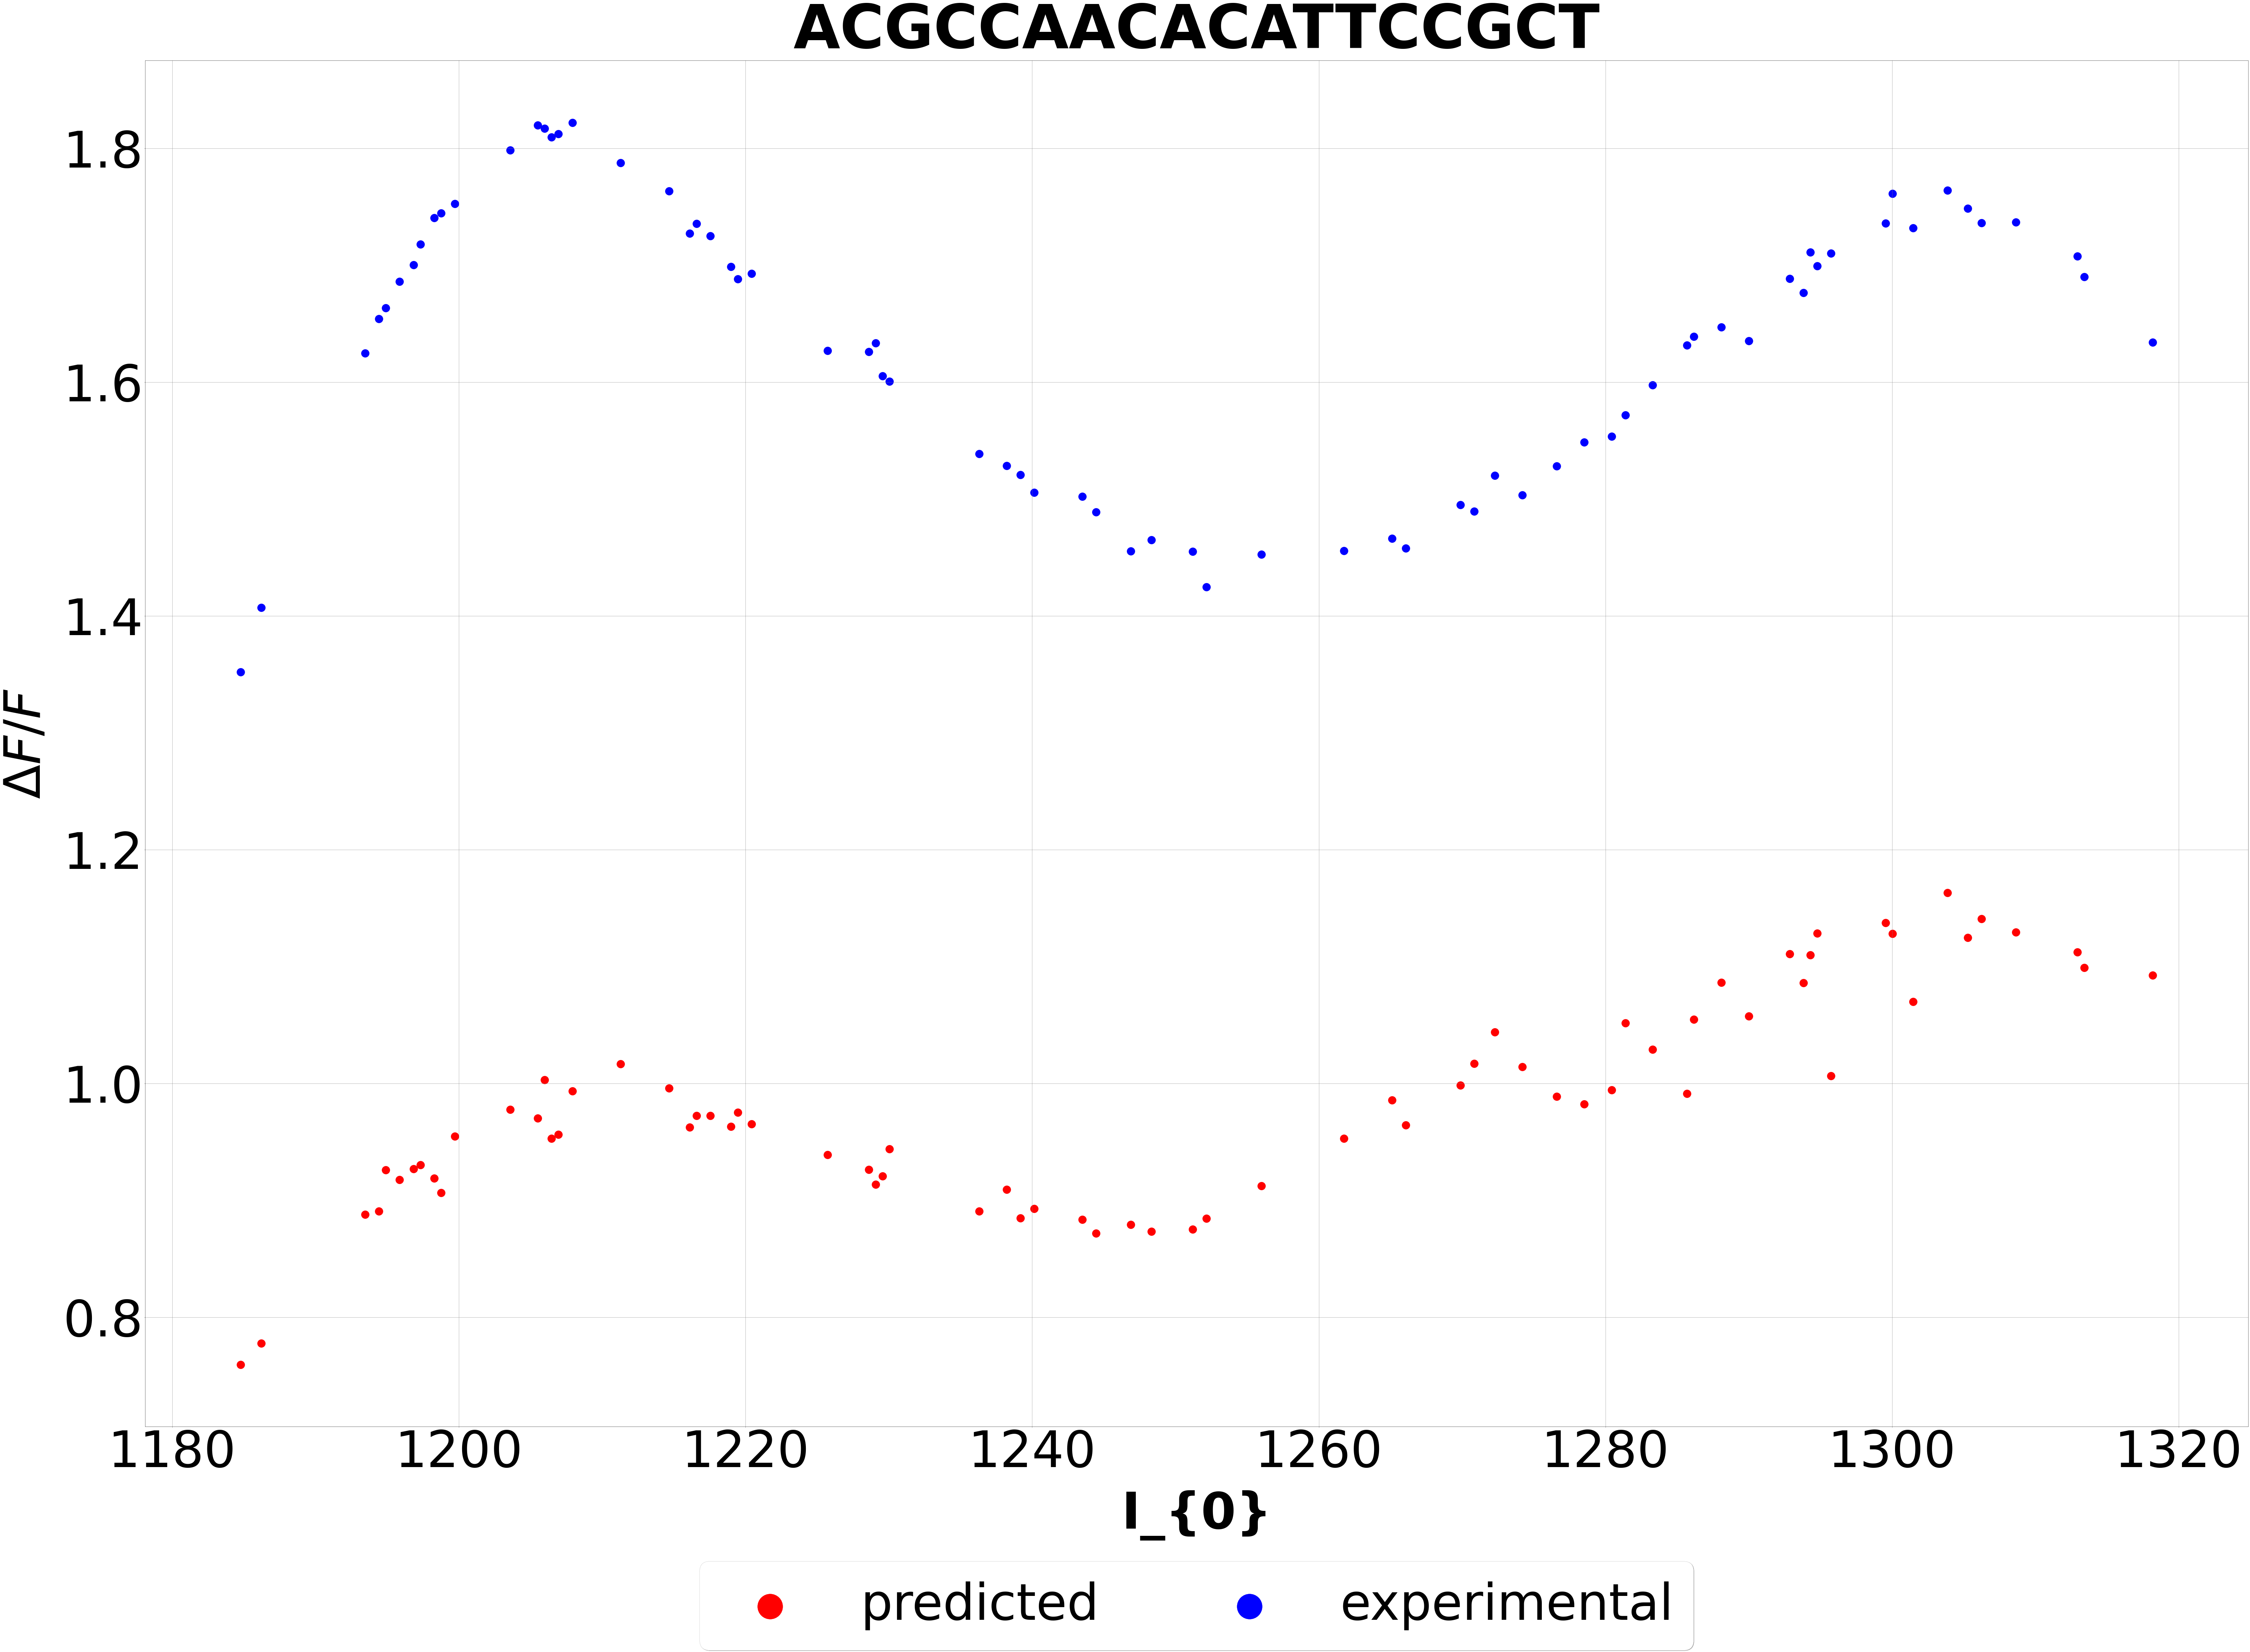

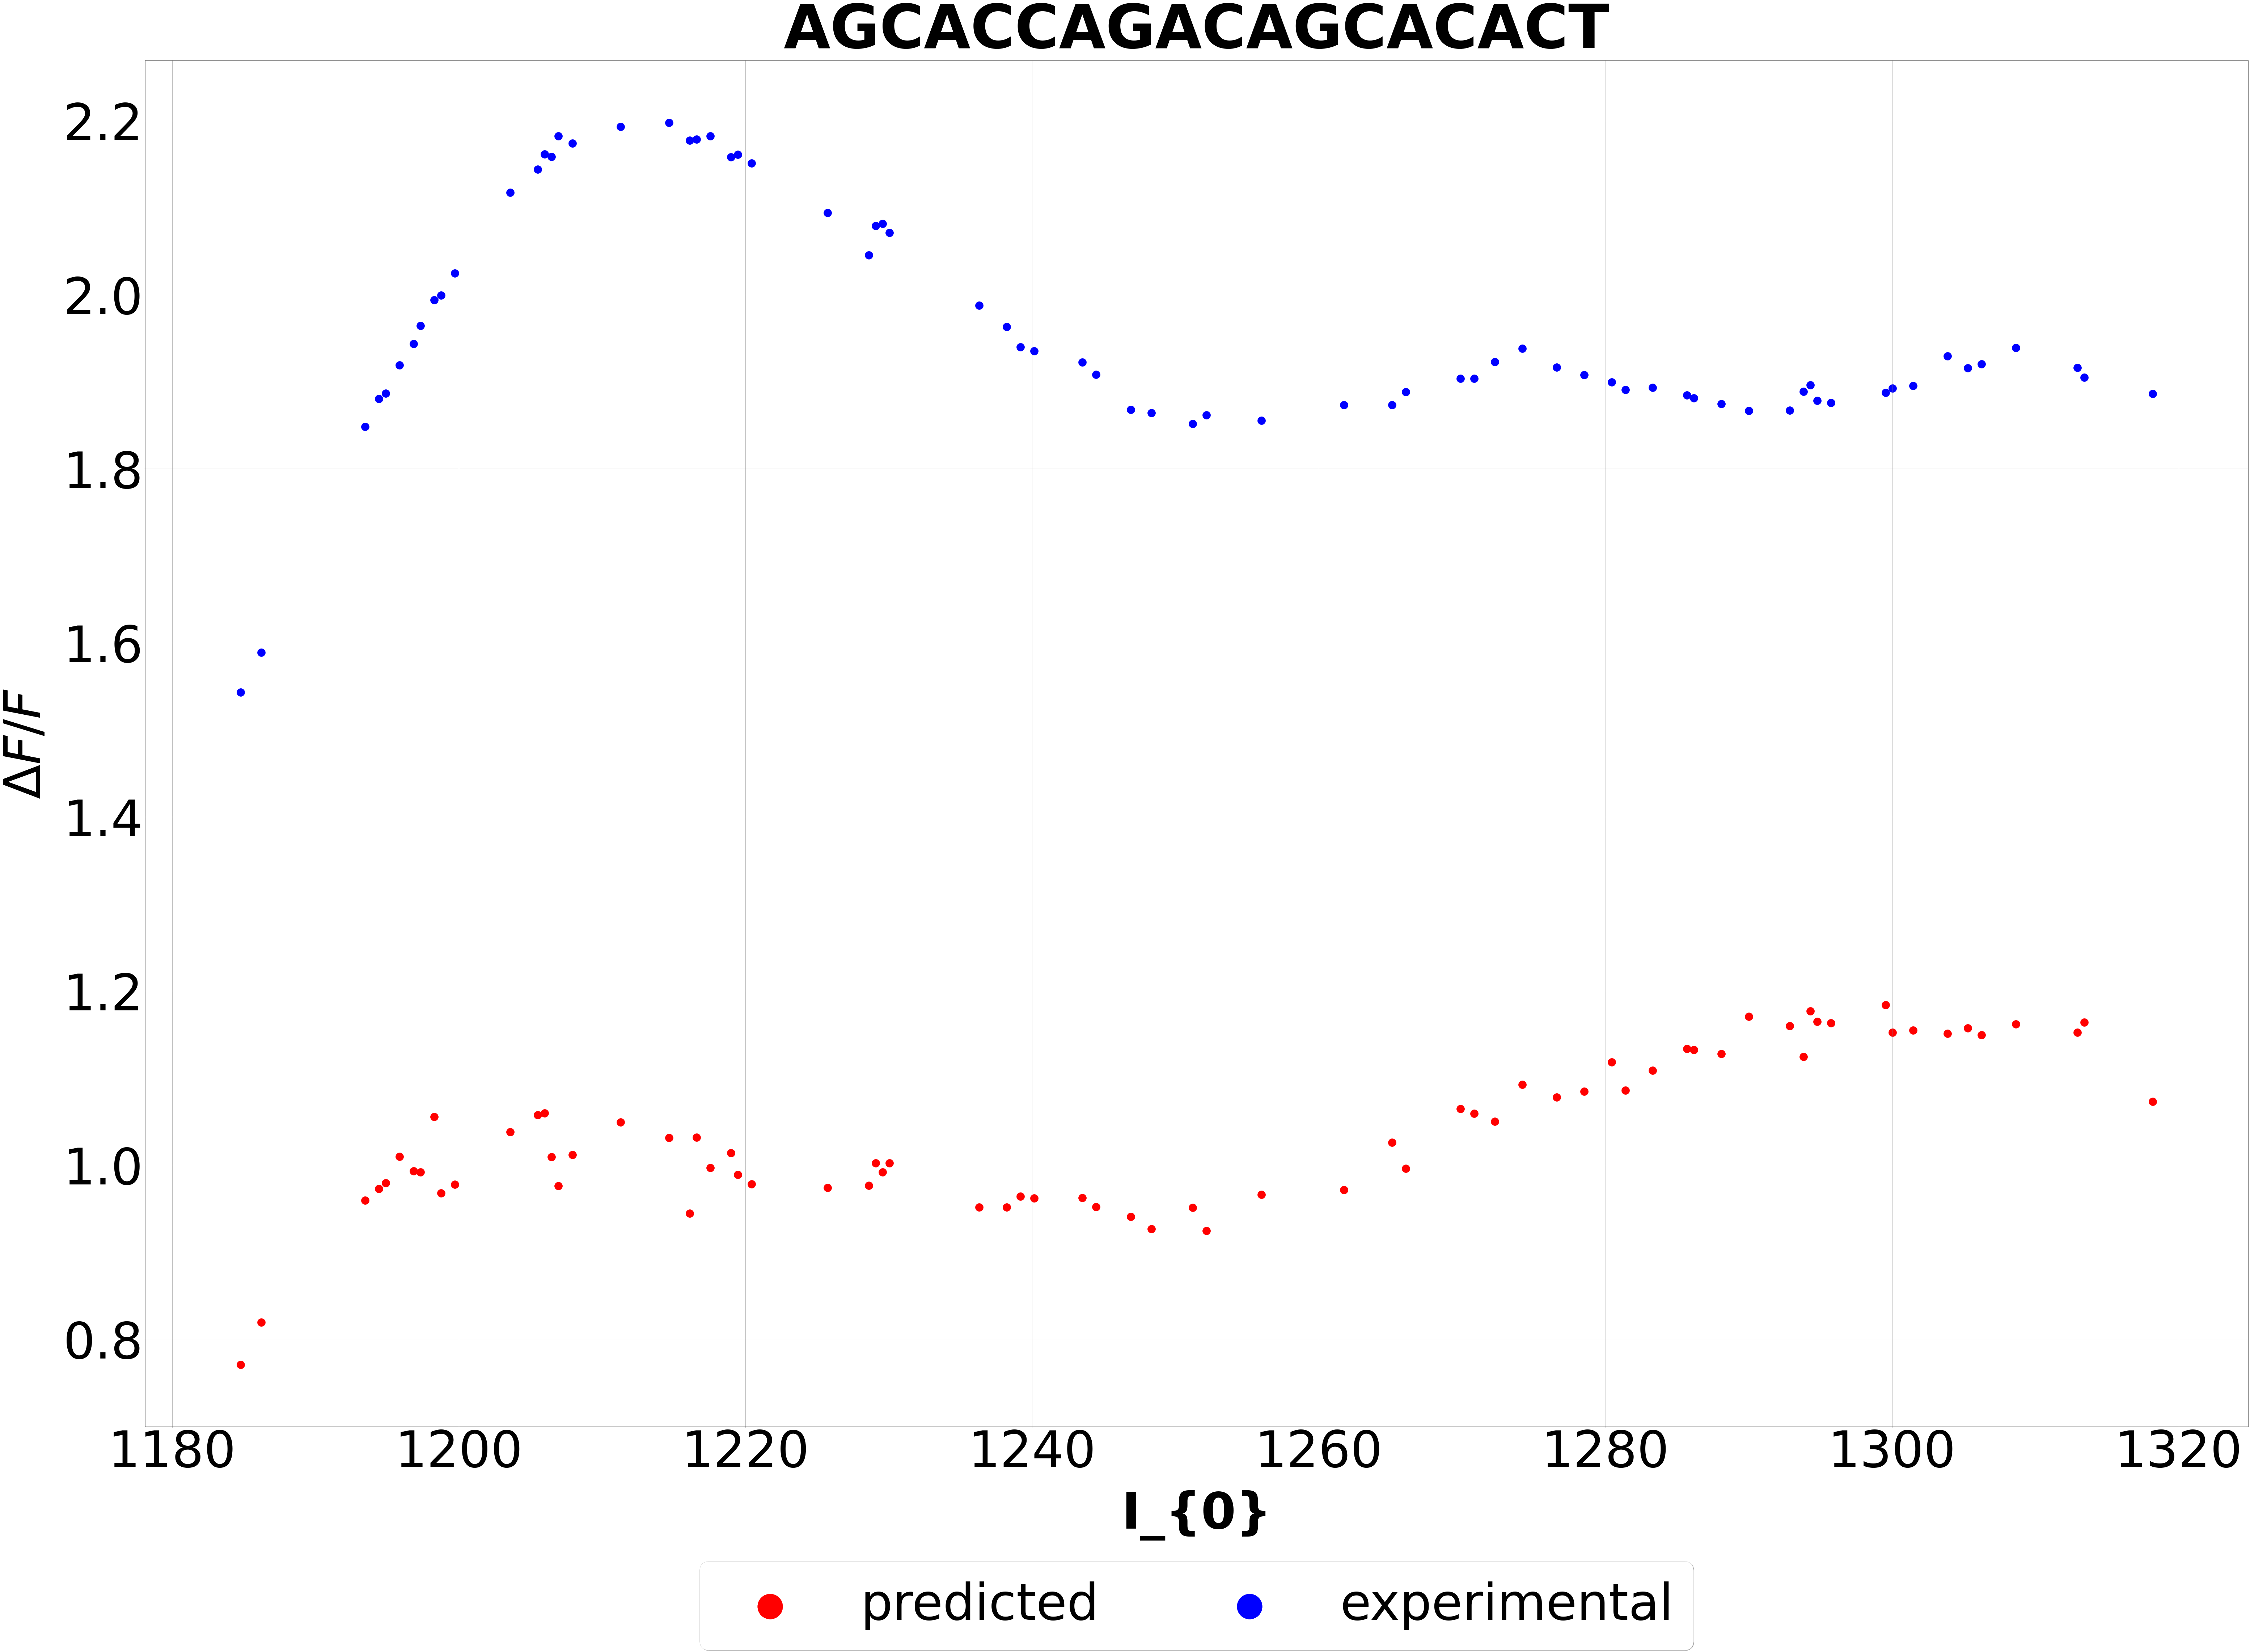

In [42]:
for seq in df_pre.index:
    ploting_prediction_experimental(df_val, df_pre, seq,'imm_0.05_tol_0.05/{}.png'.format(seq))